### Imports

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization, LeakyReLU
from keras import regularizers
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
# Helper libraries
import numpy as np
import gc
import matplotlib.pyplot as plt
print(tf.__version__)

2.4.1


### Cleaning up

In [2]:
def clean_up(model):
    keras.backend.clear_session()
    del model
    gc.collect()

### Plotting results

In [3]:
def plot_history(hs, epochs, metric):
    print()
    plt.style.use('dark_background')
    plt.rcParams['figure.figsize'] = [15, 8]
    plt.rcParams['font.size'] = 16
    plt.clf()
    %tensorflow_version 1.x
    for label in hs:
        plt.plot(hs[label].history[metric], label='{0:s} train {1:s}'.format(label, metric))
        plt.plot(hs[label].history['val_{0:s}'.format(metric)], label='{0:s} validation {1:s}'.format(label, metric))
    x_ticks = np.arange(0, epochs + 1, epochs / 10)
    x_ticks [0] += 1
    plt.xticks(x_ticks)
    plt.ylim((0, 1))
    plt.xlabel('Epochs')
    plt.ylabel('Loss' if metric=='loss' else 'Accuracy')
    plt.legend()
    plt.show()

### Data manipulation

This uses the Fashion MNIST dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels).
Loading the dataset returns four NumPy arrays:

1. The train_images and train_labels arrays are the training set—the data the      model uses to learn.

2. The model is tested against the test set, the test_images, and test_labels      arrays.



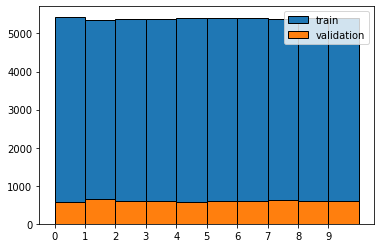

train images:54000
validation images:6000
test images:10000


(54000, 28, 28, 1)

In [4]:
val_number=6000 #10% of the training dataset
classes = 10

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

val_images = train_images[:val_number]
val_labels = train_labels[:val_number]
train_images = train_images[val_number:]
train_labels = train_labels[val_number:]

plt.hist(train_labels, bins =[0,1,2,3,4,5,6,7,8,9,10],edgecolor = 'black',label='train')
plt.hist(val_labels, bins =[0,1,2,3,4,5,6,7,8,9,10],edgecolor = 'black',label='validation')
plt.legend(loc='upper right')
plt.xticks(range(10))
plt.show()

test_images = test_images.reshape(test_images.shape[0],28,28,1)
train_images = train_images.reshape(train_images.shape[0],28,28,1)
val_images = val_images.reshape(val_images.shape[0],28,28,1)

val_images= val_images.astype('float32')
test_images = test_images.astype('float32')
train_images = train_images.astype('float32')

train_images = train_images / 255.0
test_images = test_images / 255.0
val_images = val_images /255.0

val_labels = np_utils.to_categorical(val_labels, classes)
test_labels = np_utils.to_categorical(test_labels, classes)
train_labels = np_utils.to_categorical(train_labels, classes)

print("train images:{}".format(train_images.shape[0]))
print("validation images:{}".format(val_images.shape[0]))
print("test images:{}".format(test_images.shape[0]))
train_images.shape

The labels are an array of integers, ranging from 0 to 9. These correspond to the class of clothing the image represents.

Each image is mapped to a single label. Since the class names are not included with the dataset, store them here to use later when plotting the images:

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Simple NN

In [6]:
model = tf.keras.Sequential()
model.add(Flatten(input_shape=(28, 28,1)))
model.add(Dense(512, activation='relu'))
#model.add(BatchNormalization())
#model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
#model.add(BatchNormalization())
#model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


### Compile and fit

In [7]:
epochs = 30
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.001, momentum=0.99, nesterov=False),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=epochs,validation_data=(val_images, val_labels))
evaluation = model.evaluate(test_images,  test_labels, verbose=2)
clean_up(model=model)

Epoch 1/30
1688/1688 [==============================] - 5s 2ms/step - loss: 0.8070 - accuracy: 0.7168 - val_loss: 0.4248 - val_accuracy: 0.8473
Epoch 2/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3924 - accuracy: 0.8580 - val_loss: 0.3746 - val_accuracy: 0.8610
Epoch 3/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3592 - accuracy: 0.8694 - val_loss: 0.3498 - val_accuracy: 0.8733
Epoch 4/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3301 - accuracy: 0.8786 - val_loss: 0.3559 - val_accuracy: 0.8703
Epoch 5/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3024 - accuracy: 0.8876 - val_loss: 0.3349 - val_accuracy: 0.8795
Epoch 6/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2851 - accuracy: 0.8951 - val_loss: 0.3403 - val_accuracy: 0.8738
Epoch 7/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2740 - accuracy: 0.8970 - val_loss: 0.3395 - val_accuracy:

### Results with simple NN

Train Loss     : 0.14960
Validation Loss: 0.35116
Test Loss      : 0.37566
---
Train Accuracy     : 0.94441
Validation Accuracy: 0.89483
Test Accuracy      : 0.89060

TensorFlow is already loaded. Please restart the runtime to change versions.


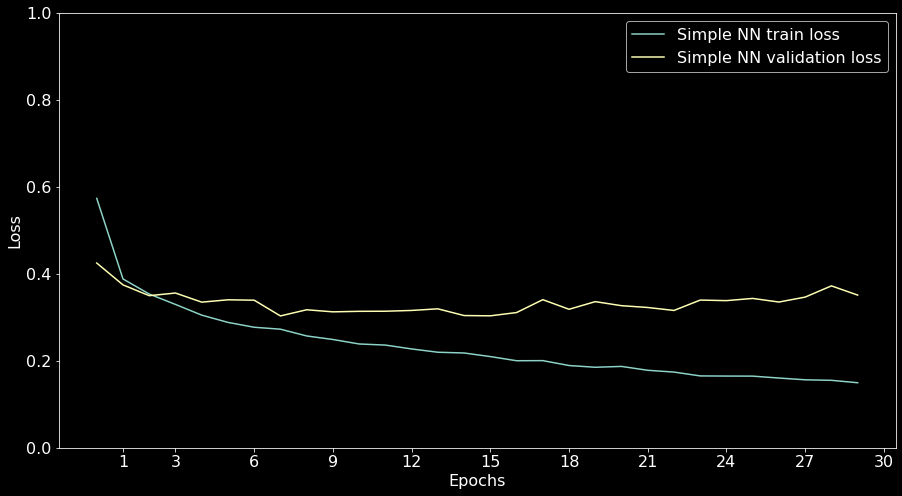


TensorFlow is already loaded. Please restart the runtime to change versions.


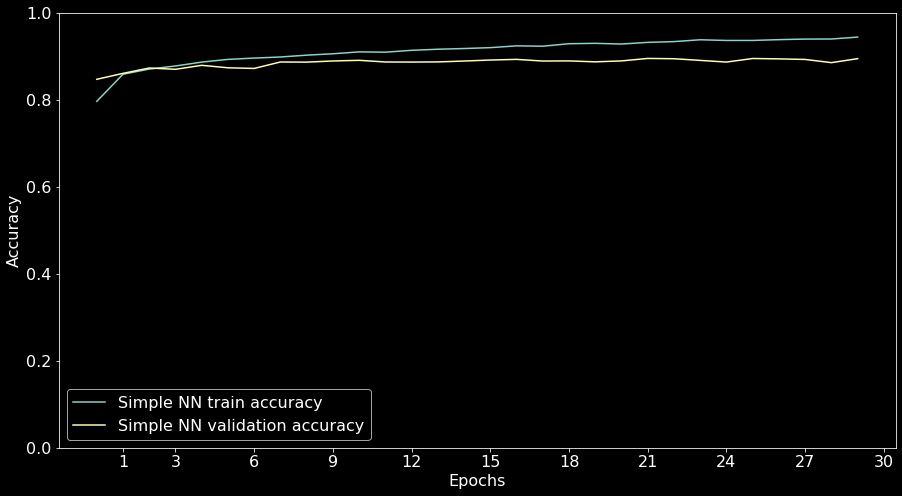

In [8]:
print("Train Loss     : {0:.5f}".format(history.history['loss'][-1]))
print("Validation Loss: {0:.5f}".format(history.history['val_loss'][-1]))
print("Test Loss      : {0:.5f}".format(evaluation[0]))
print("---")
print("Train Accuracy     : {0:.5f}".format(history.history['accuracy'][-1]))
print("Validation Accuracy: {0:.5f}".format(history.history['val_accuracy'][-1]))
print("Test Accuracy      : {0:.5f}".format(evaluation[1]))

plot_history(hs={'Simple NN': history}, epochs=epochs, metric='loss')
plot_history(hs={'Simple NN': history}, epochs=epochs, metric='accuracy')

### CNN model without any regularization

In [9]:
model = keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),

    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),

    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
      tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),

    tf.keras.layers.Dense(10,  activation=tf.nn.softmax)
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0

### Compile and fit

In [10]:
epochs = 30
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=epochs,validation_data=(val_images, val_labels))
evaluation = model.evaluate(test_images,  test_labels, verbose=2)
clean_up(model=model)

Epoch 1/30
1688/1688 [==============================] - 7s 3ms/step - loss: 0.6266 - accuracy: 0.7624 - val_loss: 0.3074 - val_accuracy: 0.8832
Epoch 2/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2864 - accuracy: 0.8931 - val_loss: 0.2650 - val_accuracy: 0.8992
Epoch 3/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2263 - accuracy: 0.9147 - val_loss: 0.2341 - val_accuracy: 0.9133
Epoch 4/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1956 - accuracy: 0.9279 - val_loss: 0.2183 - val_accuracy: 0.9197
Epoch 5/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1700 - accuracy: 0.9360 - val_loss: 0.2224 - val_accuracy: 0.9145
Epoch 6/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1468 - accuracy: 0.9450 - val_loss: 0.2172 - val_accuracy: 0.9195
Epoch 7/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1272 - accuracy: 0.9520 - val_loss: 0.2389 - val_accuracy:

### Results without any regularization

we observe high overfitting

Train Loss     : 0.02672
Validation Loss: 0.51883
Test Loss      : 0.61060
---
Train Accuracy     : 0.99107
Validation Accuracy: 0.92383
Test Accuracy      : 0.91870

TensorFlow is already loaded. Please restart the runtime to change versions.


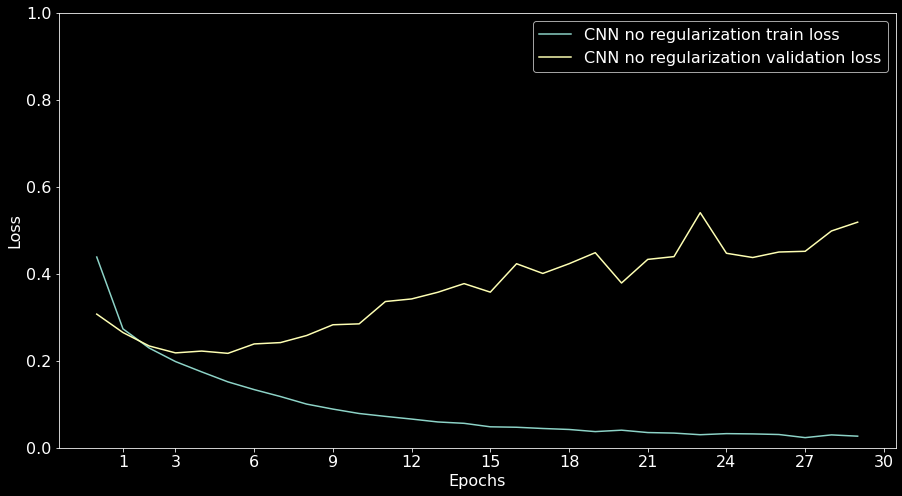


TensorFlow is already loaded. Please restart the runtime to change versions.


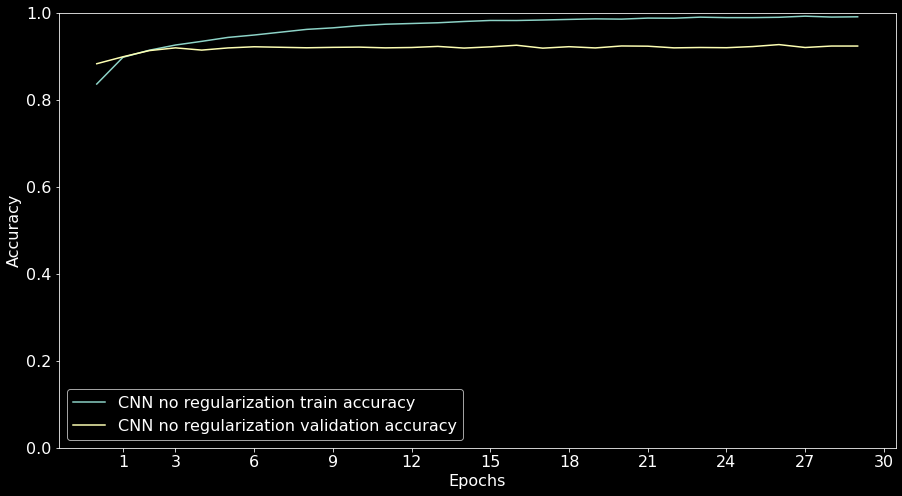

In [11]:
print("Train Loss     : {0:.5f}".format(history.history['loss'][-1]))
print("Validation Loss: {0:.5f}".format(history.history['val_loss'][-1]))
print("Test Loss      : {0:.5f}".format(evaluation[0]))
print("---")
print("Train Accuracy     : {0:.5f}".format(history.history['accuracy'][-1]))
print("Validation Accuracy: {0:.5f}".format(history.history['val_accuracy'][-1]))
print("Test Accuracy      : {0:.5f}".format(evaluation[1]))

plot_history(hs={'CNN no regularization': history}, epochs=epochs, metric='loss')
plot_history(hs={'CNN no regularization': history}, epochs=epochs, metric='accuracy')

### CNN with batch normalization and dropout

In [12]:
model = tf.keras.Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', input_shape=(28,28,1), kernel_initializer='glorot_uniform'))
model.add(BatchNormalization())

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same',kernel_initializer='glorot_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=1, padding='same',kernel_initializer='glorot_uniform'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', strides=1, padding='same',kernel_initializer='glorot_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu',kernel_initializer='glorot_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu',kernel_initializer='glorot_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax',kernel_initializer='glorot_uniform'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0

### Compile and fit

In [13]:
epochs = 50
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False),
              #optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=epochs,validation_data=(val_images, val_labels))

evaluation = model.evaluate(test_images,  test_labels, verbose=2)
clean_up(model=model)

Epoch 1/50
1688/1688 [==============================] - 16s 9ms/step - loss: 0.9917 - accuracy: 0.6810 - val_loss: 0.3867 - val_accuracy: 0.8592
Epoch 2/50
1688/1688 [==============================] - 15s 9ms/step - loss: 0.4720 - accuracy: 0.8371 - val_loss: 0.3110 - val_accuracy: 0.8918
Epoch 3/50
1688/1688 [==============================] - 15s 9ms/step - loss: 0.3865 - accuracy: 0.8679 - val_loss: 0.2867 - val_accuracy: 0.8983
Epoch 4/50
1688/1688 [==============================] - 15s 9ms/step - loss: 0.3351 - accuracy: 0.8849 - val_loss: 0.2583 - val_accuracy: 0.9088
Epoch 5/50
1688/1688 [==============================] - 15s 9ms/step - loss: 0.3010 - accuracy: 0.8964 - val_loss: 0.2538 - val_accuracy: 0.9090
Epoch 6/50
1688/1688 [==============================] - 15s 9ms/step - loss: 0.2717 - accuracy: 0.9031 - val_loss: 0.2461 - val_accuracy: 0.9105
Epoch 7/50
1688/1688 [==============================] - 15s 9ms/step - loss: 0.2451 - accuracy: 0.9129 - val_loss: 0.2075 - val_ac

### Results with batch normalization and dropout
there is still overfitting

Train Loss     : 0.04231
Validation Loss: 0.19811
Test Loss      : 0.22518
---
Train Accuracy     : 0.98543
Validation Accuracy: 0.94350
Test Accuracy      : 0.94150

TensorFlow is already loaded. Please restart the runtime to change versions.


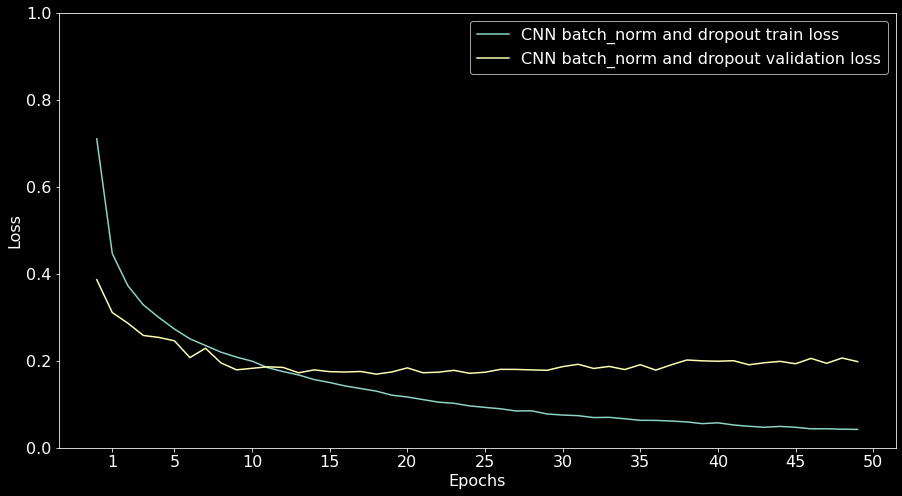


TensorFlow is already loaded. Please restart the runtime to change versions.


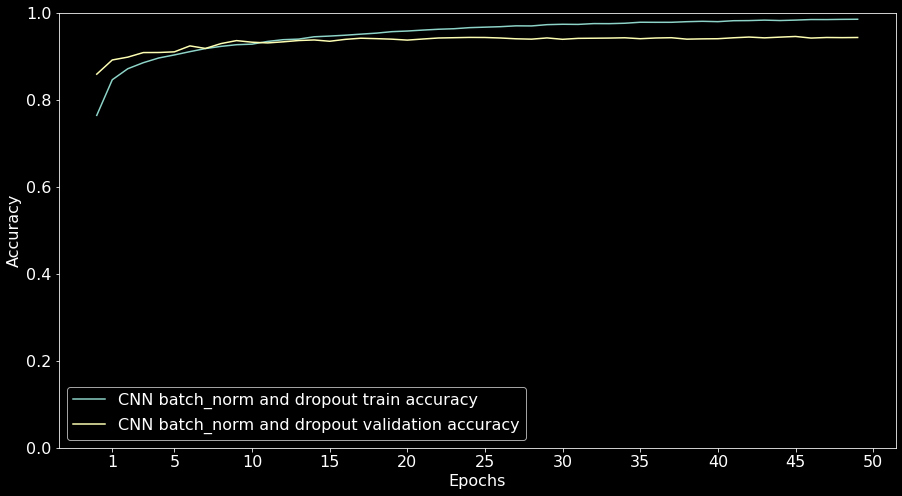

In [14]:
print("Train Loss     : {0:.5f}".format(history.history['loss'][-1]))
print("Validation Loss: {0:.5f}".format(history.history['val_loss'][-1]))
print("Test Loss      : {0:.5f}".format(evaluation[0]))
print("---")
print("Train Accuracy     : {0:.5f}".format(history.history['accuracy'][-1]))
print("Validation Accuracy: {0:.5f}".format(history.history['val_accuracy'][-1]))
print("Test Accuracy      : {0:.5f}".format(evaluation[1]))

plot_history(hs={'CNN batch_norm and dropout': history}, epochs=epochs, metric='loss')
plot_history(hs={'CNN batch_norm and dropout': history}, epochs=epochs, metric='accuracy')

### CNN with extra l2-regularization

In [15]:
l2_hyperparameter = 0.001
l2=regularizers.l2(l2_hyperparameter)
model = keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)),#kernel_regularizer=l2),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'),#kernel_regularizer=l2),
   tf.keras.layers.BatchNormalization(),
    Dropout(0.25),

    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'), #kernel_regularizer=l2),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    Dropout(0.25),
    
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'), #kernel_regularizer=l2),
    tf.keras.layers.BatchNormalization(),
    Dropout(0.25),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation='relu',kernel_regularizer=l2),
    tf.keras.layers.BatchNormalization(),
    Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu',kernel_regularizer=l2),
    tf.keras.layers.BatchNormalization(),
    Dropout(0.5),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0

### Compile and fit

In [ ]:
epochs = 30
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5,mode='min',verbose=1)
history = model.fit(train_images, train_labels, epochs=epochs,validation_data=(val_images, val_labels),callbacks=[callback])

evaluation = model.evaluate(test_images,  test_labels, verbose=2)
clean_up(model=model)

Epoch 1/30
1688/1688 [==============================] - 21s 12ms/step - loss: 2.1696 - accuracy: 0.7578 - val_loss: 1.2408 - val_accuracy: 0.8835
Epoch 2/30
1688/1688 [==============================] - 19s 11ms/step - loss: 1.2657 - accuracy: 0.8661 - val_loss: 1.0983 - val_accuracy: 0.8968
Epoch 3/30
1688/1688 [==============================] - 19s 11ms/step - loss: 1.1264 - accuracy: 0.8779 - val_loss: 1.0298 - val_accuracy: 0.8958
Epoch 4/30
1688/1688 [==============================] - 19s 11ms/step - loss: 1.0989 - accuracy: 0.8820 - val_loss: 0.9552 - val_accuracy: 0.9145
Epoch 5/30
1688/1688 [==============================] - 19s 12ms/step - loss: 1.0634 - accuracy: 0.8878 - val_loss: 0.9799 - val_accuracy: 0.8978
Epoch 6/30
1688/1688 [==============================] - 19s 12ms/step - loss: 1.0316 - accuracy: 0.8893 - val_loss: 0.9109 - val_accuracy: 0.9158
Epoch 7/30
1688/1688 [==============================] - 19s 12ms/step - loss: 0.9782 - accuracy: 0.8960 - val_loss: 0.9348 -

### Results with extra l2-regularization

In [ ]:
print("Train Loss     : {0:.5f}".format(history.history['loss'][-1]))
print("Validation Loss: {0:.5f}".format(history.history['val_loss'][-1]))
print("Test Loss      : {0:.5f}".format(evaluation[0]))
print("---")
print("Train Accuracy     : {0:.5f}".format(history.history['accuracy'][-1]))
print("Validation Accuracy: {0:.5f}".format(history.history['val_accuracy'][-1]))
print("Test Accuracy      : {0:.5f}".format(evaluation[1]))

plot_history(hs={'CNN with extra l2-regularization': history}, epochs=epochs, metric='loss')
plot_history(hs={'CNN with extra l2-regularization': history}, epochs=epochs, metric='accuracy')

### Data Augmentation

In [ ]:
model = tf.keras.Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', input_shape=(28,28,1)))
model.add(BatchNormalization())

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=1, padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', strides=1, padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

### Augmented data

In [ ]:
datagen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                               height_shift_range=0.08, zoom_range=0.08)
batches = datagen.flow(train_images, train_labels, batch_size=256)
val_batches = datagen.flow(val_images, val_labels, batch_size=256)

### Compile and fit

In [ ]:
epochs = 40
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit_generator(batches, steps_per_epoch=54000 / 256, epochs=epochs,
                               validation_data = val_batches, validation_steps = 6000 / 256 )

evaluation = model.evaluate(test_images,  test_labels, verbose=2)
clean_up(model=model)

### Results with Data augmentation

In [ ]:
print("Train Loss     : {0:.5f}".format(history.history['loss'][-1]))
print("Validation Loss: {0:.5f}".format(history.history['val_loss'][-1]))
print("Test Loss      : {0:.5f}".format(evaluation[0]))
print("---")
print("Train Accuracy     : {0:.5f}".format(history.history['accuracy'][-1]))
print("Validation Accuracy: {0:.5f}".format(history.history['val_accuracy'][-1]))
print("Test Accuracy      : {0:.5f}".format(evaluation[1]))

plot_history(hs={'CNN with data augmentation': history}, epochs=epochs, metric='loss')
plot_history(hs={'CNN with data augmentatin': history}, epochs=epochs, metric='accuracy')

In [ ]:
exit()